In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from skipper import tiling
from astropy import coordinates
from skipper import observe, visualize

### Define COSMOS region

In [3]:
# \\ COSMOS region
center = coordinates.SkyCoord ("10h00m28.6s+02d12m21.0s")
size =  (1.4, 1.4)

edges = [ (center.ra.deg-size[0]/2., center.dec.deg-size[0]/2.),
          (center.ra.deg+size[0]/2., center.dec.deg-size[0]/2.),
          (center.ra.deg+size[0]/2., center.dec.deg+size[0]/2.),
          (center.ra.deg-size[0]/2., center.dec.deg+size[0]/2.) ]
#cosmos_area = geometry.Polygon ( edges )

### Create object that generates COSMOS dithering pattern

In [4]:
frd = tiling.FocusedRandomDither (center, random_max=0.1, offset_radius=0.01, ndither=40)

In [5]:
#frd._make_grid ()
#poly_l, area_a, centers = frd.compute_coverage ( cosmos_area )
centers = frd.get_centers ()

Text(0, 0.5, 'Dec (deg)')

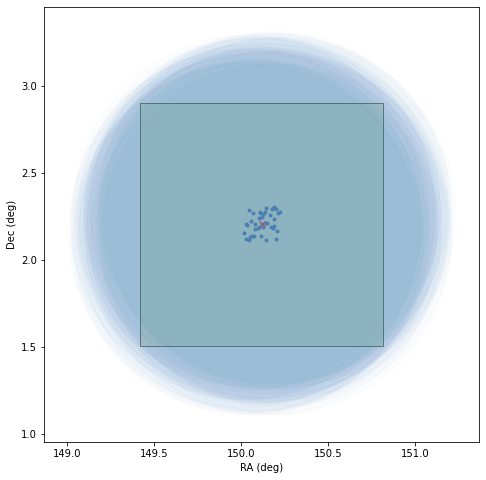

In [6]:
# \\ Visualize the dithering pattern
fig = plt.figure ( figsize=(8,8))
ax = plt.subplot(111, aspect='equal')
rect = patches.Rectangle ( [center.ra.deg - size[0]/2, center.dec.deg - size[1]/2],
                          width = size[0], 
                          height= size[1],
                         fc='lightgrey', ec='k', alpha=0.5)
ax.add_patch (rect)

for ij in range(frd.ndither):
    patch = patches.Circle ( centers[ij], radius=frd.fov_radius, fc='C0', ec='tab:blue', lw=2, alpha=0.01)
    ax.add_patch(patch)
    ax.scatter(*centers[ij], color='C0', marker='.')
ax.scatter ( *frd.center, color='r', marker='x')

ax.set_xlim ( center.ra.deg - 1.25,  center.ra.deg  + 1.25)
ax.set_ylim ( center.dec.deg- 1.25,  center.dec.deg + 1.25)

ax.set_xlabel ( 'RA (deg)')
ax.set_ylabel ('Dec (deg)')

### Build Observing Catalog and plan nights

In [7]:
# \\ Build observing catalog, and take a quick look
ocat = observe.ObsCatalog(comment='--', proposer='LeathaudGreene')
catalog = ocat.build_catalog(centers[:,0], centers[:,1], 'COSMOS', 'N708', 'science', 10.*60)
catalog.head()

,comment,filter,seqtot,seqnum,expType,object,proposer,program,RA,propid,dec,expTime
0,--,N708,40,1,science,COSMOS,LeathaudGreene,Merian,150.119167,2020B-XXXX,2.205833,600.0
1,--,N708,40,2,science,COSMOS,LeathaudGreene,Merian,150.210429,2020B-XXXX,2.269993,600.0
2,--,N708,40,3,science,COSMOS,LeathaudGreene,Merian,150.126112,2020B-XXXX,2.192501,600.0
3,--,N708,40,4,science,COSMOS,LeathaudGreene,Merian,150.060127,2020B-XXXX,2.225254,600.0
4,--,N708,40,5,science,COSMOS,LeathaudGreene,Merian,150.174024,2020B-XXXX,2.193356,600.0


In [8]:
# \\ Define the observatory site -- default is CTIO
ctio = observe.ObservingSite ()
priorities = {'COSMOS':0}

In [41]:
# \\ generate observing queue for night 1
obstime = datetime.datetime ( 2021, 3, 5, 10, tzinfo=pytz.utc )
catalog, is_queued = ocat.plan_night ( obstime, ctio, maxairmass=1.5, object_priority=priorities )

3600.0s filled by priority=0.0 objects


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  catalog['seqnum'] = np.arange(1,catalog.shape[0]+1)
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  catalog['seqtot'] = catalog.shape[0]


NameError: name 'g2q' is not defined

In [40]:
cmass.loc[going_to_queue.loc[going_to_queue].index, 'going_to_queue']

KeyError: 'the label [going_to_queue] is not in the [columns]'

In [28]:
is_queued.has_priority.unique()

array([0.])

In [27]:
is_queued.reindex(cmass.index)['has_priority'] == 0.

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
Name: has_priority, dtype: bool

In [25]:
is_queued.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [24]:
cmass.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [10]:
# \\ generate observing queue for night 2
obstime = datetime.datetime ( 2021, 3, 6, 3, tzinfo=pytz.utc )
_,is_queued = ocat.plan_night ( obstime, ctio, maxairmass=1.5, is_queued=is_queued )

In [11]:
# \\ verify that all pointings are queued for observation
assert is_queued.values.all()

In [13]:
for key,val in priorities.items():
    break

In [14]:
key

'COSMOS'

In [15]:
val

0